In [1]:
%matplotlib inline

import os
import sys
from subprocess import call
from datetime import datetime,timedelta

import socket

import xarray as xr
import numpy as np

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
hostname = socket.gethostname()
if any(s in hostname for s in ['cheyenne','yslogin','geyser','caldera']):
    scratch = '/glade/scratch/'+os.environ['USER']
elif 'cgd.ucar.edu' in hostname:
    scratch = '/project/oce/mclong/scratch'
else:
    print('hostname not found')
droot = os.path.join(scratch,'wod2013')

In [3]:
extraction = 'global_req_temp_salt_o2'
max_depth = 2000.

In [42]:
ds = xr.open_dataset(os.path.join(droot,extraction+'.gridded.sigma.anom_wrt_woa.ann.nc'),decode_times=False)

ds = ds.isel(time=np.where((1958<=ds.year)&(ds.year<=2014))[0])

ds.sigma.values = np.round(100.*np.average(np.vstack((sigma_edges[0:-1],sigma_edges[1:])),axis=0))/100.

print ds.year
ds

<xarray.DataArray 'year' (time: 57)>
array([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int32)
Coordinates:
  * time     (time) int64 0 365 731 1096 1461 1826 2192 2557 2922 3287 3653 ...


<xarray.Dataset>
Dimensions:          (lat: 180, lon: 360, sigma: 51, time: 57)
Coordinates:
  * lat              (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
  * lon              (lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * sigma            (sigma) float64 24.5 24.55 24.6 24.65 24.7 24.75 24.8 ...
  * time             (time) int64 0 365 731 1096 1461 1826 2192 2557 2922 ...
Data variables:
    area             (lat, lon) float64 ...
    oxygen           (time, sigma, lat, lon) float32 ...
    oxygen_cnt       (time, sigma, lat, lon) int32 ...
    salinity         (time, sigma, lat, lon) float32 ...
    salinity_cnt     (time, sigma, lat, lon) int32 ...
    temperature      (time, sigma, lat, lon) float32 ...
    temperature_cnt  (time, sigma, lat, lon) int32 ...
    year             (time) int32 1958 1959 1960 1961 1962 1963 1964 1965 ...

In [44]:
target_sigma = 26.5

cnt = ds.oxygen_cnt.sel(sigma=target_sigma)
years_sampled_fraction = cnt.where(cnt<=0).fillna(1).sum(dim='time') / len(ds.year)
years_sampled_fraction.name = 'Fraction of years sampled'
years_sampled_fraction

<xarray.DataArray 'Fraction of years sampled' (lat: 180, lon: 360)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
    sigma    float64 26.5

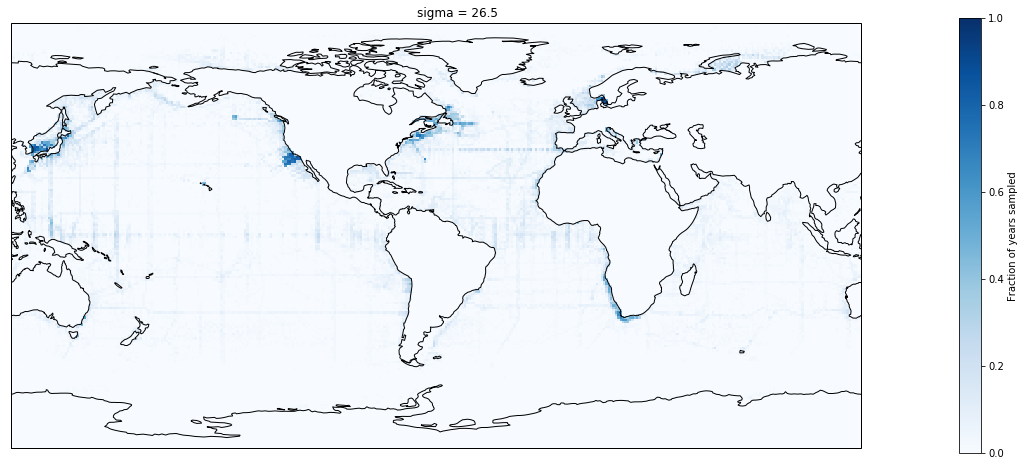

In [45]:
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=300))

years_sampled_fraction.plot.pcolormesh(ax=ax,vmax=1,transform=ccrs.PlateCarree(),cmap='Blues')
ax.coastlines()

In [47]:
mean_anomaly = ds.oxygen.sel(sigma=target_sigma).mean(dim='time')
mean_anomaly.name = 'Mean O$_2$ anomaly'
mean_anomaly

<xarray.DataArray 'Mean O$_2$ anomaly' (lat: 180, lon: 360)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
    sigma    float64 26.5

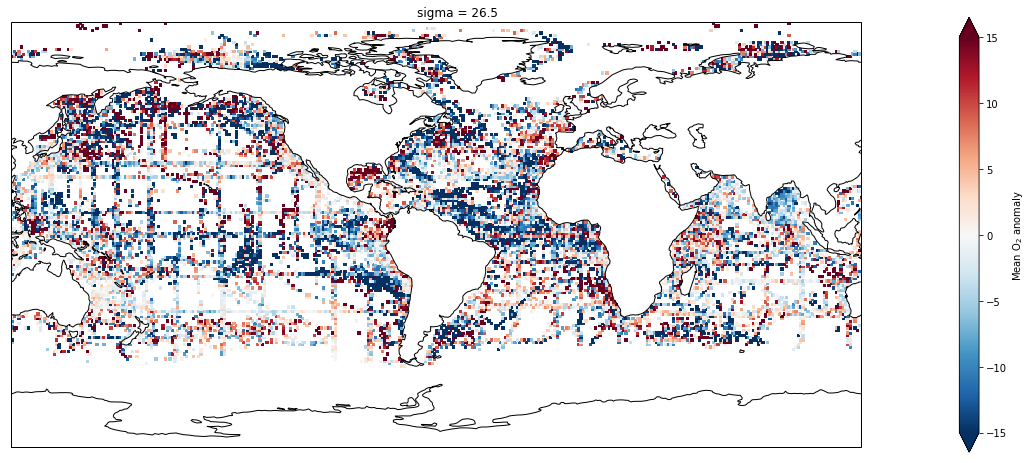

In [48]:
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=300))
mean_anomaly.plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),vmin=-15,vmax=15,cmap='RdBu_r')
ax.coastlines()